In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/world_population.csv")

## Data Set up

In [5]:
df

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Data Analysis

In [17]:
num_countries = len(df["Country/Territory"].unique())
countries_list = df["Country/Territory"].unique()
num_countries

234

In [18]:
continents = df["Continent"].unique()
continents

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [21]:
most_pop_country1970 = df.loc[df['1970 Population'].idxmax()]['Country/Territory']
most_pop_country1970

'China'

In [27]:
population_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                       '2000 Population', '1990 Population', '1980 Population', '1970 Population']

for column in population_columns:
    top_5_countries = df.nlargest(5, column)[['Country/Territory', column]]
    print(f"\nTop 5 most populated countries in {column}:")
    print(top_5_countries)



Top 5 most populated countries in 2022 Population:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862

Top 5 most populated countries in 2020 Population:
    Country/Territory  2020 Population
41              China       1424929781
92              India       1396387127
221     United States        335942003
93          Indonesia        271857970
156          Pakistan        227196741

Top 5 most populated countries in 2015 Population:
    Country/Territory  2015 Population
41              China       1393715448
92              India       1322866505
221     United States        324607776
93          Indonesia        259091970
156          Pakistan        210969298

Top 5 most populated countries in 2010 Population:
    Country/Territory  2010 Population
41              China       1348191368
92          

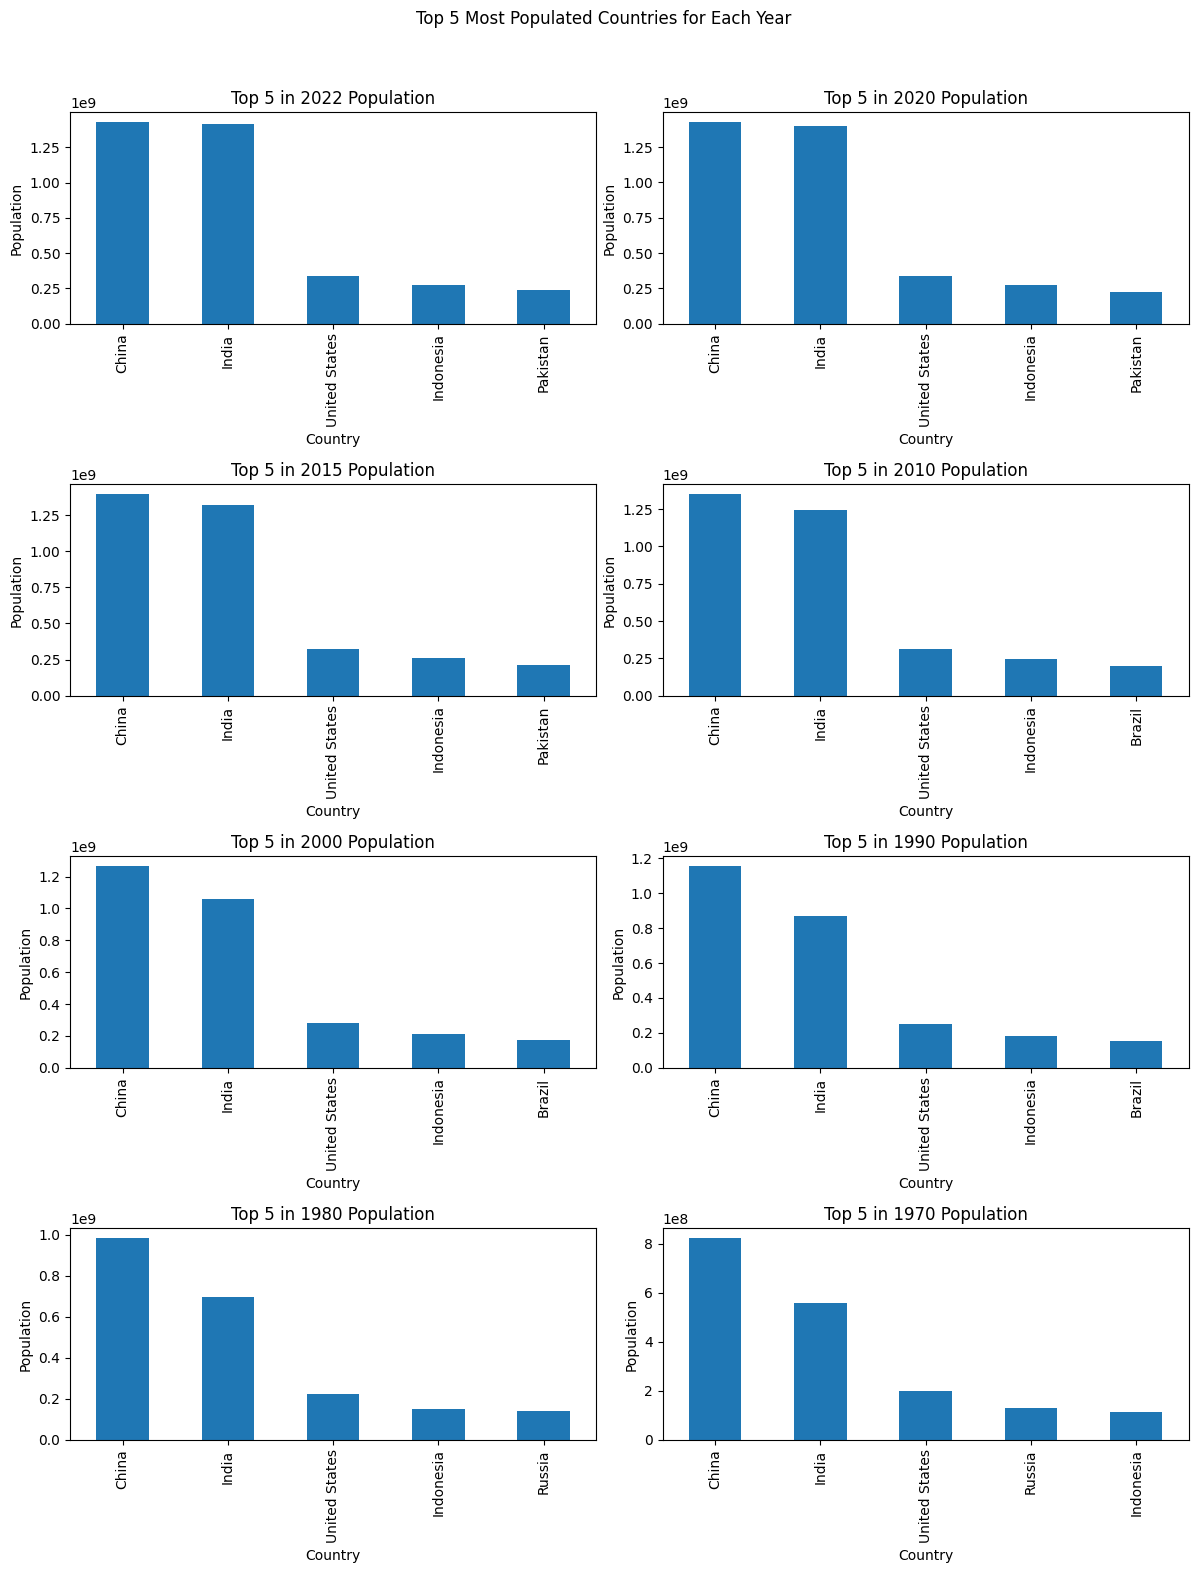

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle('Top 5 Most Populated Countries for Each Year')


axes = axes.flatten()


for i, column in enumerate(population_columns):
    top_5_countries = df.nlargest(5, column)[['Country/Territory', column]]
    top_5_countries.plot(kind='bar', x='Country/Territory', y=column, ax=axes[i], legend=False)
    axes[i].set_title(f'Top 5 in {column}')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel('Population')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [31]:
for column in population_columns:
    continent_population = df.groupby('Continent')[column].sum()


    continents = continent_population.nlargest()
    print(continents)


Continent
Asia             4721383274
Africa           1426730932
Europe            743147538
North America     600296136
South America     436816608
Name: 2022 Population, dtype: int64
Continent
Asia             4663086535
Africa           1360671810
Europe            745792196
North America     594236593
South America     431530043
Name: 2020 Population, dtype: int64
Continent
Asia             4458250182
Africa           1201102442
Europe            741535608
North America     570383850
South America     413134396
Name: 2015 Population, dtype: int64
Continent
Asia             4220041327
Africa           1055228072
Europe            735613934
North America     542720651
South America     393078250
Name: 2010 Population, dtype: int64
Continent
Asia             3735089604
Africa            818946032
Europe            726093423
North America     486069584
South America     349634282
Name: 2000 Population, dtype: int64
Continent
Asia             3210563577
Europe            720320797
Afri

In [42]:
df = df.rename(columns={'Density (per km²)': 'Density'})

In [44]:
import pandas as pd

population_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population',
                       '2000 Population', '1990 Population', '1980 Population', '1970 Population']

population_columns_with_continent = ['Continent'] + population_columns

continent_population = df[population_columns_with_continent].groupby('Continent').sum()


print("Population for each continent:")
print(continent_population)


Population for each continent:
               2022 Population  2020 Population  2015 Population  \
Continent                                                          
Africa              1426730932       1360671810       1201102442   
Asia                4721383274       4663086535       4458250182   
Europe               743147538        745792196        741535608   
North America        600296136        594236593        570383850   
Oceania               45038554         43933426         40403283   
South America        436816608        431530043        413134396   

               2010 Population  2000 Population  1990 Population  \
Continent                                                          
Africa              1055228072        818946032        638150629   
Asia                4220041327       3735089604       3210563577   
Europe               735613934        726093423        720320797   
North America        542720651        486069584        421266425   
Oceania         

In [45]:
population_columns_new = ['2022 Population', '1970 Population']

population_columns_with_continent = ['Continent'] + population_columns_new
population_2022_1970 = df[population_columns_with_continent].groupby('Continent').sum()
population_2022_1970['Percentage Increase'] = ((population_2022_1970['2022 Population'] - population_2022_1970['1970 Population']) / population_2022_1970['1970 Population']) * 100

print("Percentage Increase in Population for each continent from 1970 to 2022:")
print(population_2022_1970[['Percentage Increase']])


Percentage Increase in Population for each continent from 1970 to 2022:
               Percentage Increase
Continent                         
Africa                  290.409905
Asia                    120.120725
Europe                   13.297813
North America            90.307634
Oceania                 131.200871
South America           126.391835


In [48]:
africa_population_percentage = (1426730932 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100
asia_population_percentage = (4721383274 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100
europe_population_percentage = (743147538 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100
n_america_population_percentage = (600296136 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100
oceania_population_percentage = (45038554 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100
s_america_population_percentage = (436816608 / (1426730932 + 4721383274 + 743147538 + 600296136 + 45038554 + 436816608)) * 100

In [56]:
oceania_population_percentage

0.5648591608481732

## Summary and Results

through the data analysis we were able to discover some statistics from the dataset. we were able to determine the largest populations across the years;

China and India remain the top two most populated countries throughout the years. Inturn, the most populated continent is Asia, again across all years.

From 1970 to 2022 Africa's population increased by 290% followed by Oceania whos increased by 131% whilst Europe's only increased 13% over the years.

finally, Asia's population accounts to 59.21% of the global population in 2022, followed by Africa's with 17.89% whilst Oceania accounts for the lowest portion of the global population accounting for 0.56% of the global populaiton.
